# 1 - Modelo de Regresion para Predecir costos de un inmueble

---

## 1.1 Cargando los datos


[JSON Viewer](http://jsonviewer.stack.hu)

[Pandas: read_json](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html?highlight=read_json#pandas.read_json)

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Ubicarme en la rais para poder utilizar todas las carpetas

from sys import path
import os

path.append(os.path.realpath('../'))

In [3]:
datos = pd.read_json(
    path_or_buf='../../datasets/inmuebles.json',
    orient='columns'
)
datos

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


## 1.2 Explorando las informaciones

In [3]:
datos.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [4]:
datos.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

## 1.3 Tratamiento de datos iniciales

### Normalización

In [5]:
datos_lista1 = pd.json_normalize(datos.ident)
datos_lista1.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [6]:
datos_lista2 = pd.json_normalize(datos.listing, sep='_')
datos_lista2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


### Juntando los dataframes

In [7]:
datos_inmuebles = pd.concat([datos_lista1, datos_lista2], axis=1)
datos_inmuebles.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [8]:
datos_inmuebles.shape

(73615, 21)

In [9]:
datos_inmuebles.to_json('inmueblesv1.json', orient='records', force_ascii=False)

In [10]:
datos_inmuebles.address_zone.value_counts()

Zona Oeste      37116
Zona Sul        19222
Zona Norte      15191
Zona Central     1921
                  165
Name: address_zone, dtype: int64

In [11]:
for columna in datos_inmuebles.columns:
    print('========='*30)
    print(datos_inmuebles[columna].value_counts())

775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: customerID, Length: 73615, dtype: int64
Website    73615
Name: source, dtype: int64
Apartamento    59106
Casa            9389
Outros          5120
Name: types_unit, dtype: int64
Residencial    69596
Comercial       4019
Name: types_usage, dtype: int64
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: address_city, dtype: int64
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: address_location_lon, Length: 25753, dtype: int64
-23.000371    399
-23.017479    278
-22.937463    236
-2

## 1.4 Limpieza

### Filtro

In [12]:
filtro = (datos_inmuebles['types_usage'] == 'Residencial') & (datos_inmuebles['address_city'] ==  'Rio de Janeiro')

#Aplicando el filtro
datos_inmuebles = datos_inmuebles[filtro]
datos_inmuebles.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


### Tipos de variables

In [13]:
#Mucha atención al tipo de variables y al índice
datos_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

Verificando la salida de `.info`

> 69588 entries, 0 to 73614

 Observamos que tenemos que resetear el index, para que las infos estén ordenadas correctamente.


In [14]:
datos_inmuebles.reset_index(drop=True, inplace=True)

In [15]:
#mostrar el RangeIndex
datos_inmuebles.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


Ahora está correcto.

In [16]:
datos_inmuebles = datos_inmuebles.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64',
})

datos_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

## 1.5 - Tratamiento de datos finales

### Trabajando los nulos

#### Datos nulos zone

In [17]:
datos_inmuebles.address_zone.value_counts()

Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: address_zone, dtype: int64

In [18]:
datos_inmuebles['address_zone'] = datos_inmuebles['address_zone'].replace('', np.nan)

In [19]:
#verificación
datos_inmuebles.address_zone.isnull().sum()

149

In [20]:
#relación zona con barrio
datos_inmuebles.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,...,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,...,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,...,100.0,0,0,0,0,132,132,0,0,0
3,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,...,400.0,3,2,1,1,60,0,3,4,2
4,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,...,0.0,0,0,0,0,200,200,0,0,0


In [21]:
dici = datos_inmuebles[~datos_inmuebles['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')
print(dici)

[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62, 'features_totalAreas': 62, 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathrooms':

In [22]:
#diccionario de barrio por zona
dic_zonas = {dic['address_neighborhood']: dic['address_zone'] for dic in dici}
print(dic_zonas)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

In [23]:
for barrio,zona in dic_zonas.items(): datos_inmuebles.loc[datos_inmuebles['address_neighborhood'] == barrio, 'address_zone'] = zona

In [24]:
datos_inmuebles['address_zone'].isnull().sum()

0

#### Datos nulos prices

In [25]:
datos_inmuebles.prices_tax_iptu.isnull().sum()

8725

In [26]:
datos_inmuebles.prices_tax_condo.isnull().sum()

6061

In [27]:
datos_inmuebles.prices_tax_iptu.fillna(0, inplace=True)
datos_inmuebles.prices_tax_condo.fillna(0, inplace=True)

In [28]:
print(f"Total de prices nulos: {datos_inmuebles.prices_tax_iptu.isnull().sum()}")
print(f"Total de prices_tax_condo nulos: {datos_inmuebles.prices_tax_condo.isnull().sum()}")

Total de prices nulos: 0
Total de prices_tax_condo nulos: 0


### Modificar el nombre de las columnas y la selección de variables

In [29]:
datos_inmuebles.drop(['customerID', 'source', 'types_usage', 'address_city',
                    'address_location_lon', 'address_location_lat','address_neighborhood' ], axis = 1, inplace=True)

In [30]:
diccionario_columnas = {'types_unit': 'unit', 'address_zone': 'zone', 'prices_price': 'price',
                     'prices_tax_condo': 'tax_condo', 'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'bedrooms',
                      'features_bathrooms': 'bathrooms', 'features_suites': 'suites', 'features_parkingSpaces': 'parkingSpaces',
                      'features_usableAreas': 'usableAreas', 'features_totalAreas':'totalAreas', 'features_floors':'floors',
                      'features_unitsOnTheFloor':'unitsOnTheFloor', 'features_unitFloor':'unitFloor'}

datos_inmuebles = datos_inmuebles.rename(diccionario_columnas, axis = 1)
datos_inmuebles.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


# 2 - Regresión Lineal
---

## 2.1 - Correlación

*   Correlación: grado de relación entre variables. Esta relación puede ser positiva o negativa.

*   Multicolinealidad: relación perfecta o exacta entre variables.

In [31]:
correlacion = datos_inmuebles.corr()
correlacion

<ipython-input-31-6cef349969fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datos_inmuebles.corr()


,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


In [32]:
#bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

Para más detalles consultar [Documentación Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

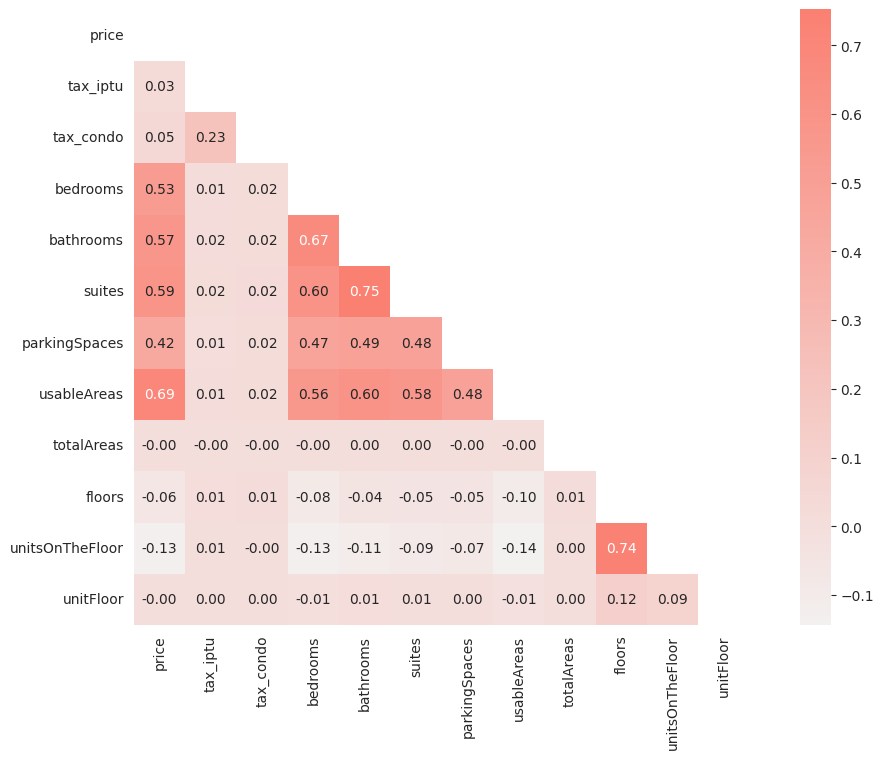

In [33]:
#visualización de las correlaciones
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacion)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacion, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

Análisis de la distribución de la variable respuesta.

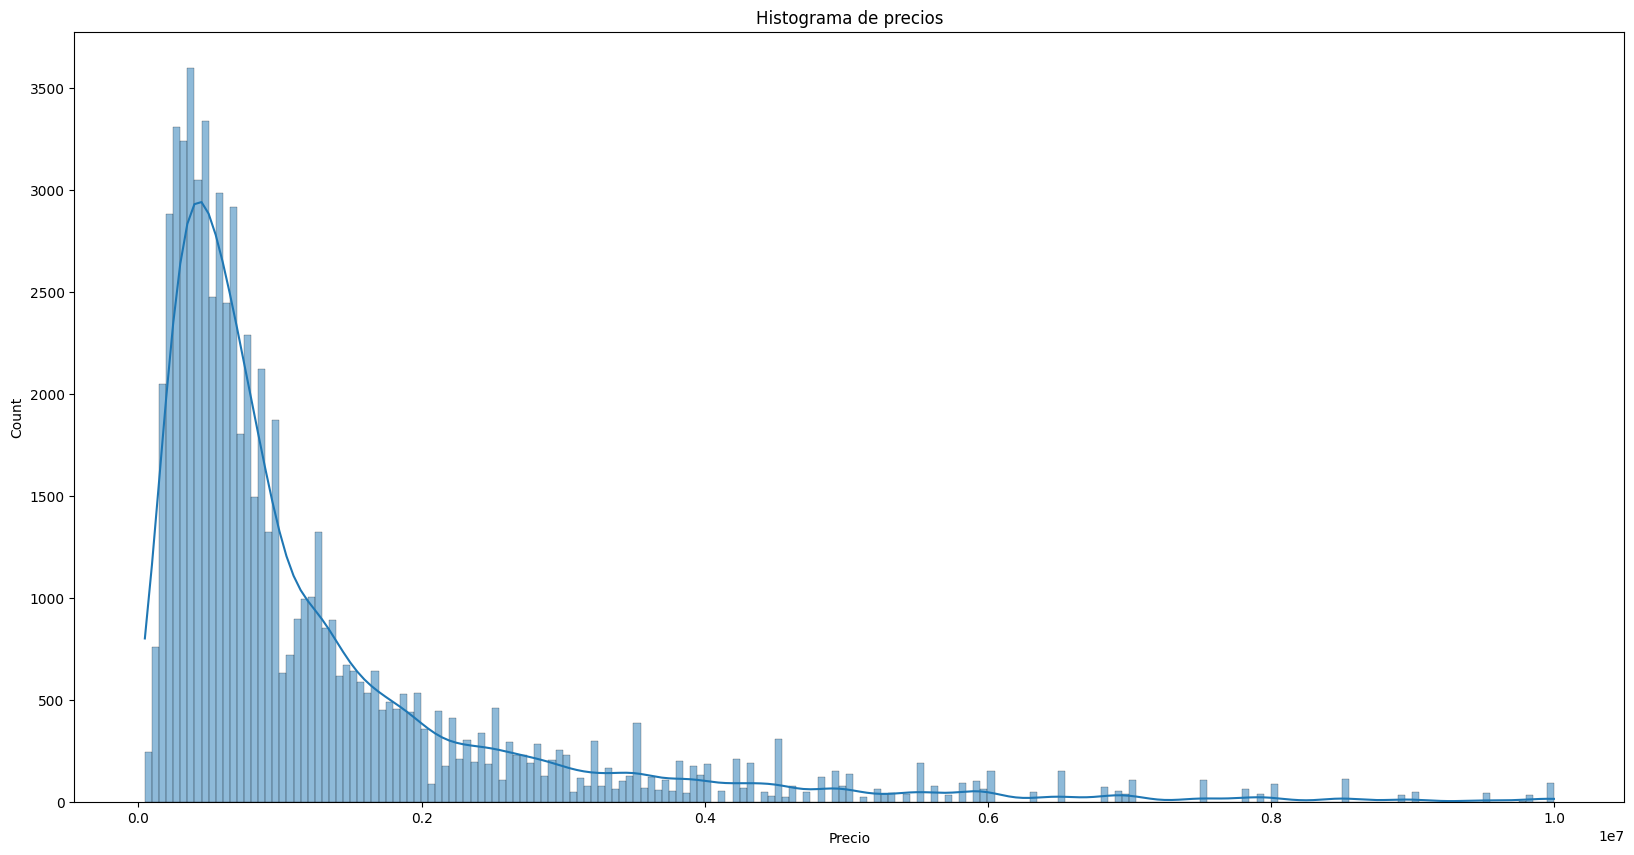

In [34]:
#antes (distribución asimetrica a la derecha)
ax = sns.histplot(data=datos_inmuebles, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de precios')
ax.set_xlabel('Precio');

### Transformación de las variables

Estamos realizando una transformación logarítmica de las variables para obtener una distribución simétrica (más cercana a la normal), por lo que podemos usar el modelo de regresión lineal. La transformación realizada es:


$$log1p = log(1+x)$$


Recuerda realizar la transformación inversa para obtener el valor original:


$$expm1 = exp(x) - 1$$




* Para más detalles consultar las documentaciones [`log1p`](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html), [`expm1`](https://numpy.org/doc/stable/reference/generated/numpy.expm1.html#numpy.expm1) e [`FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer)



In [35]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
datos_transformados = transformer.transform(datos_inmuebles.select_dtypes(exclude=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [36]:
columnas_datos_tranformados = datos_inmuebles.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([datos_inmuebles.select_dtypes(include=['object']), pd.DataFrame(datos_transformados, columns=columnas_datos_tranformados)], axis=1)
df_transformado.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


<ipython-input-37-334f95bd7f4d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_transformada = df_transformado.corr()


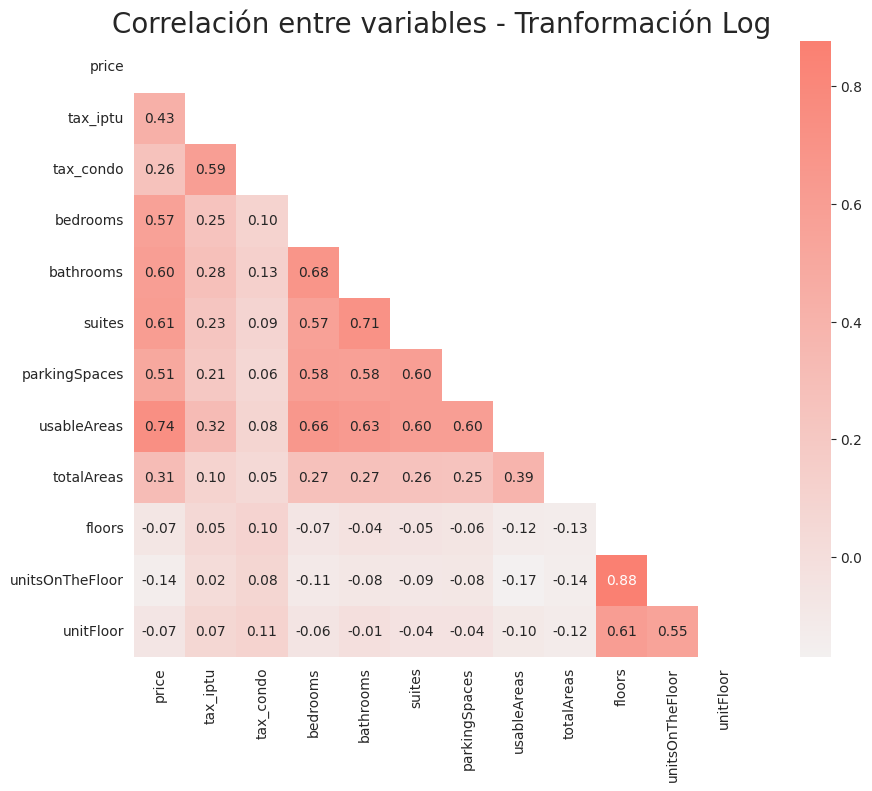

In [37]:
#despues de la transformación
correlacion_transformada = df_transformado.corr()
mask = np.zeros_like(correlacion_transformada)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacion_transformada, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlación entre variables - Tranformación Log', fontsize=20)

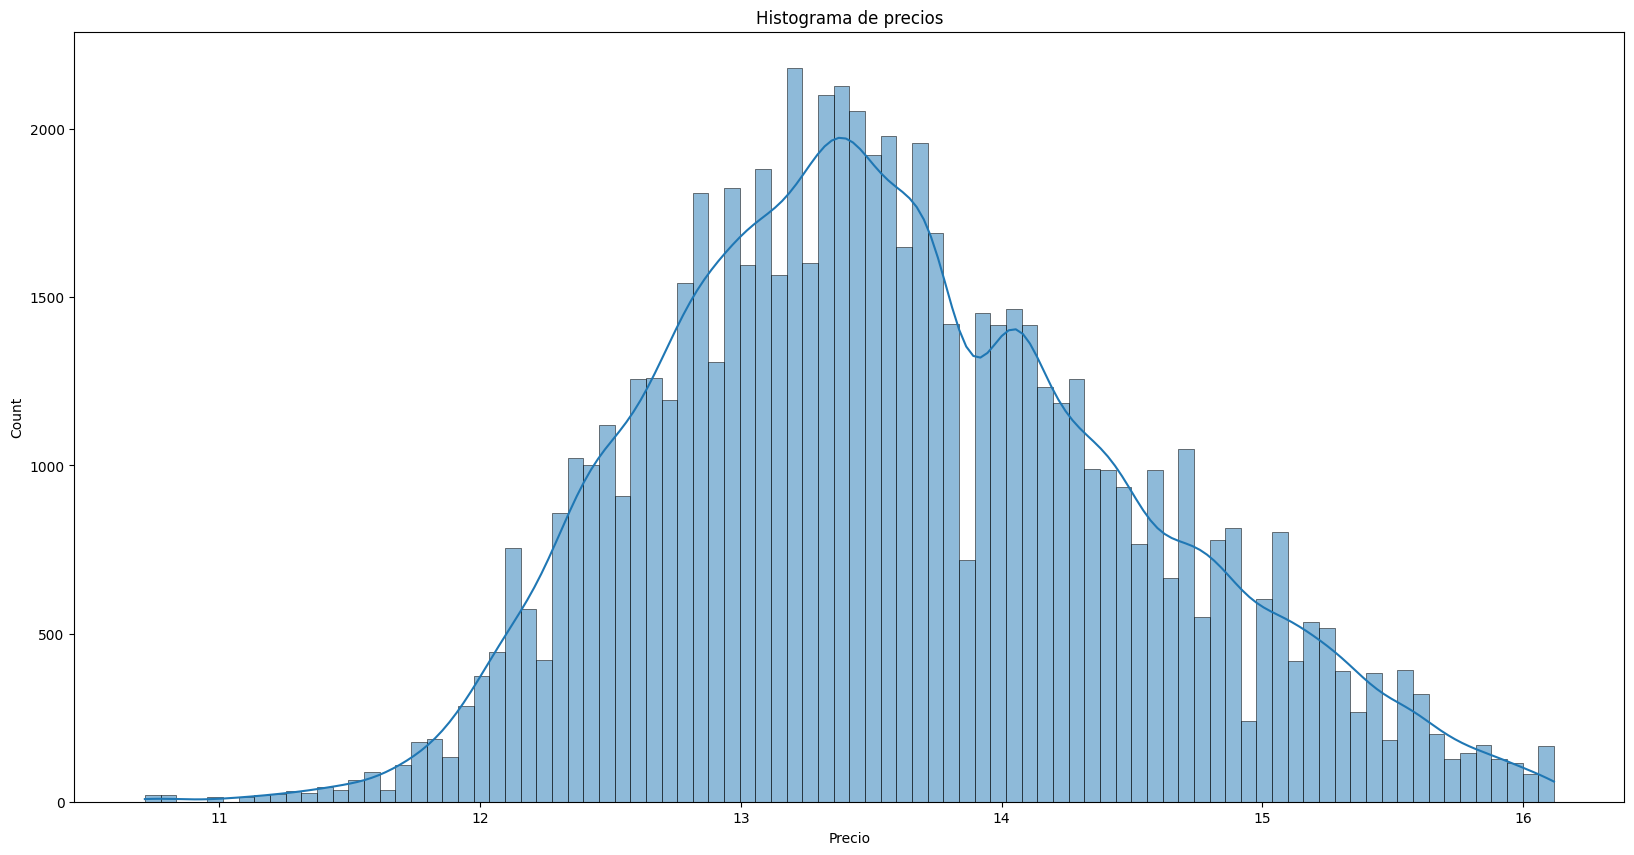

In [38]:
#después (distribución simétrica)
ax = sns.histplot(data=df_transformado, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de precios')
ax.set_xlabel('Precio');

### Dummies

In [39]:
variables_categoricas = df_transformado.select_dtypes(include=['object']).columns

In [40]:
variables_categoricas

Index(['unit', 'zone'], dtype='object')

In [41]:
df_dummies = pd.get_dummies(df_transformado[variables_categoricas])
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0


In [42]:
datos_inmuebles_dummies = pd.concat([df_transformado.drop(variables_categoricas, axis=1), df_dummies], axis=1)
datos_inmuebles_dummies.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,1,0,0,0,0,1,0
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,0,0,1,0,0,1,0


## 2.2 - Regresión Lineal

* "El análisis de regresión se refiere al estudio de la dependencia de una variable, la variable dependiente, en relación con una o más variables, las variables explicativas, con el objetivo de estimar y/o predecir el valor medio (de la población) de la primera en términos de los valores conocidos o fijados (en muestreos repetidos) de estos últimos”.

* [Documentación Sklearn - LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

* Regresión simple: la variable dependiente (`y`) está relacionada con una única variable explicativa (`X`).

* Regresión múltiple: la variable dependiente (`y`) está relacionada con más de una única variable explicativa (`Xi`).

## 2.3 - Ajuste y Predicción

### División de los datos

In [43]:
#variables independientes
X = datos_inmuebles_dummies.drop('price', axis=1)

#variable dependiente
y = datos_inmuebles_dummies['price']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
#división en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
#Inicializando el modelo
lr = LinearRegression()

In [48]:
#Entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
#Prueba
prediccion_lr = lr.predict(X_test)

In [50]:
#Resultados de la predicción
prediccion_lr

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233])

In [51]:
#transformación inversa
np.expm1(13.25768024)

572448.7513552749

## 2.4 - Métrica de desempeño

### Coeficiente de Determinación

* averiguar qué tan “bien” se ajusta una línea de regresión muestral a los datos
* r2 se encuentra entre 0 y 1
* "r2 mide la proporción o porcentaje de la variación total de Y explicada por el modelo de regresión".





In [52]:
#importar la biblioteca
from sklearn.metrics import r2_score

In [53]:
r2_lr = r2_score(y_test, prediccion_lr)
r2_lr

0.7880682093407632

### Extra

* [Documentación Sklearn - Métricas para Regresión](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

* Nota: ¡Estas métricas dependen de la escala de los datos!

* MSE (Mean Squared Error o Error cuadrático medio): media de la diferencia **elevada al cuadrado** entre el valor real y el predicho. *(penalización por error)*

* MAE (Mean Absolute Error o Error absoluto medio): media de la diferencia **absoluta** (módulo) entre el valor real y el predicho.


# 3 - Arbol de Decisión para Regresión
---





## 3.1 - Implementando el Modelo


In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
#Inicializando el modelo
dtr = DecisionTreeRegressor(random_state=42, max_depth=5)

In [56]:
#Entrenamiento
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [57]:
#Prueba
prediccion_dtr = dtr.predict(X_test)

In [58]:
#Resultados de la predicción
prediccion_dtr

array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

**Gráfico de error de predicción**: un gráfico de error de predicción muestra los objetivos reales frente a los valores predichos. En un modelo perfecto, estos puntos estarían alineados a 45 grados.


Para obtener más información sobre otras vistas:
[**Documentación de YellowBrick**](https://www.scikit-yb.org/en/latest/)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


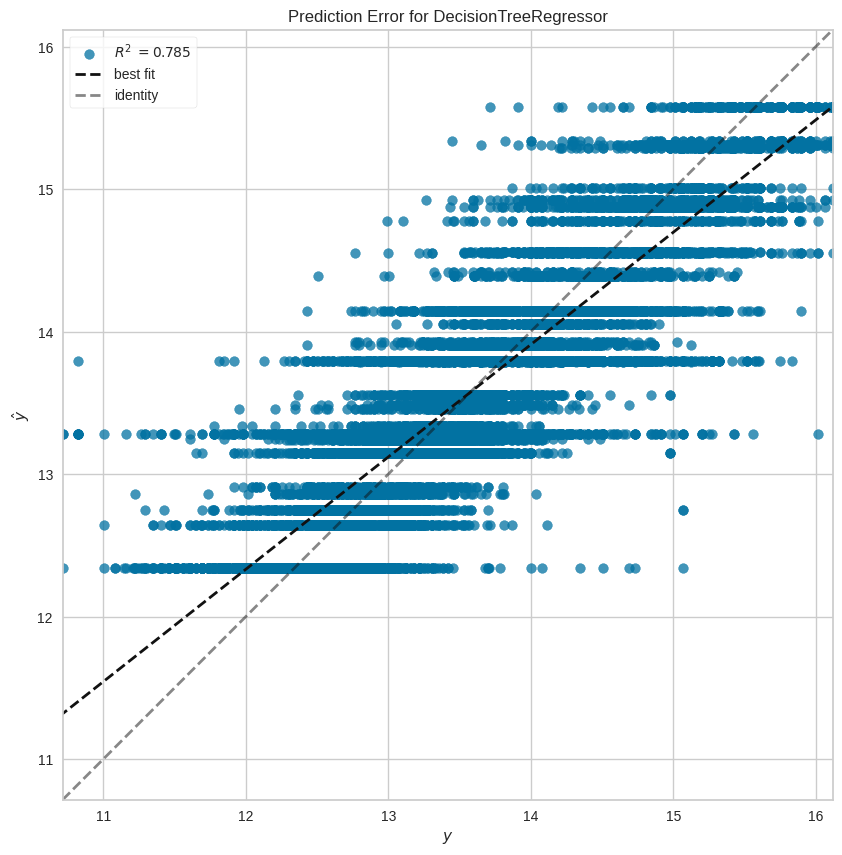

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [59]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(dtr)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

## 3.2 - Métrica

In [60]:
#coeficiente de determinación
r2_dtr = r2_score(y_test, prediccion_dtr)
r2_dtr

0.7846916218477392

# 4 - Random Forest para Regresión
---


## 4.1 - Modelo Ensemble

[Biblioteca Sklearn - Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

## 4.2 - Predicción

**Observación**
Los parámetros son prácticamente los mismos entre `DecisionTreeRegressor()` y `RandomForestRegressor()`, con la excepción de:

* `n_estimators`: número de árboles en el bosque
* `bootstrap`: define si se utilizará el método de muestreo estadístico *bootstrap*
* `oob_score`: define si se utilizará el método de muestreo *out-of-bag* para medir los errores de predicción
* `n_jobs`: número de *jobs* que se ejecutan en paralelo (computación paralela - procesadores)
* `warm_start`: adecuación de un nuevo bosque o usa un bosque existente.
* `max_samples`: en caso de que `bootstrap` sea `True`, define el número de muestras que se extraerán de X para entrenar cada árbol base.

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [63]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [64]:
prediccion_rf = rf.predict(X_test)

**Gráfico de error de predicción**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


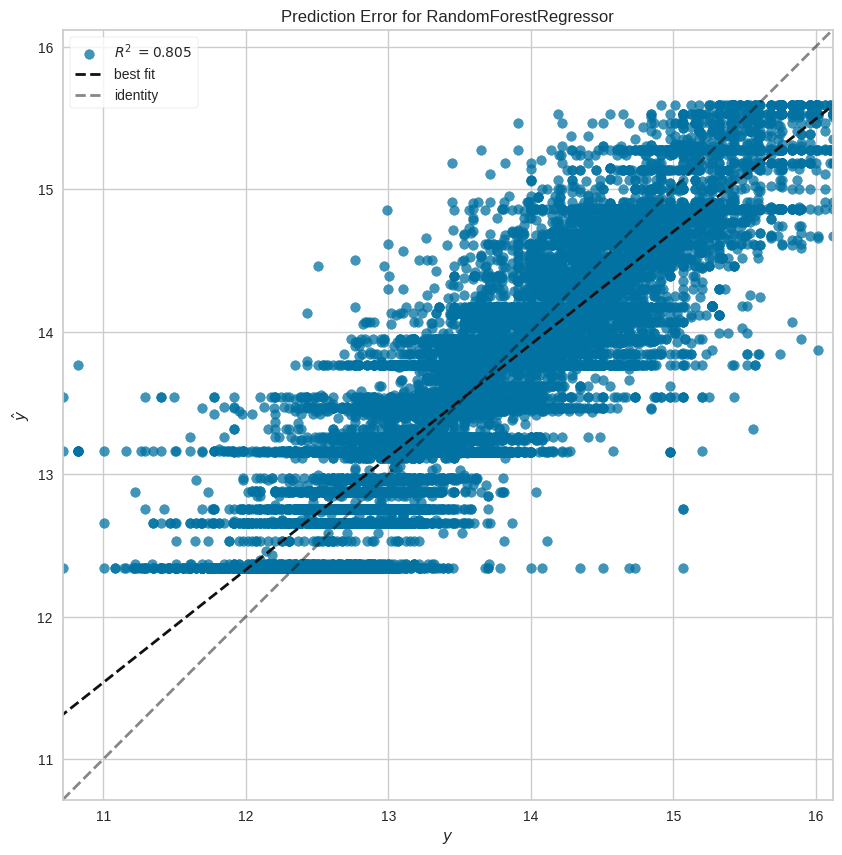

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [65]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(rf)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

## 4.3 - Métrica de desempeño

In [66]:
#coeficiente de determinación
r2_rf = r2_score(y_test, prediccion_rf)
r2_rf

0.805273364453047

# 5 - Técnicas de Optimización
---

## 5.1 - Herramientas de Optimización

* ¿Por qué optimizar?

* ¿Qué herramientas tenemos?

* [Mejorando los hiperparámetros - Documentación Sklearn](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)

### 1. Cross Validation (Validación Cruzada)

* [Documentación Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

* **Cross Validation** es una técnica ampliamente utilizada para evaluar el rendimiento de los modelos y la consiguiente verificación de tendencias en el aprendizaje automático. Consiste en particionar los datos en subconjuntos (partes), donde un subconjunto se usa para entrenamiento y otro subconjunto se usa para probar y evaluar el rendimiento del modelo.

* ¡Los datos particionados son los datos de entrenamiento (70% de los datos originales)!

* **K-fold**: el conjunto de entrenamiento se divide aleatoriamente en K subconjuntos de aproximadamente el mismo tamaño, luego se realizan K iteraciones, donde los subconjuntos K-1 son para entrenamiento y 1 para validación.

* El rendimiento calculado por validación cruzada k-fold es el promedio de todos los valores calculados en cada iteración.

### 2. Randomized Parameter Optimization (Optimización Aleatoria de Parámetros)

* [Documentación Randomized Search](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)

* [Artículo científico sobre Random Search](https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)

* "Define un espacio de búsqueda como un dominio acotado de valores de hiperparámetros y puntos de muestra aleatorios en ese dominio".

* Imagen en el artículo sobre cómo funciona esta búsqueda



## 5.2 - Optimizando el árbol de decisión

In [67]:
#división del dataset en 3 pedazos
from sklearn.model_selection import KFold

#definiendo el K - número de subconjuntos
cv = KFold(n_splits = 5, shuffle=True)

### Cross validation


In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
accuracy_cross_val_r2 = cross_val_score(estimator = dtr,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
print('Accuracy promedio de r2: {}'.format(round(accuracy_cross_val_r2.mean(), 3)))

Accuracy promedio de r2: 0.782


### Random Search Validation

In [70]:
#selección de hiperparametros
param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12, 14, 16],
    'max_features': ['sqrt', 'log2', 'auto'],
}

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
random_cv_dt = RandomizedSearchCV(
    dtr,
    param_random_dt,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

In [73]:
randomcv_dtr = random_cv_dt.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [74]:
pd.DataFrame(randomcv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,22.407312,3.744226,0.006866,0.002961,16,6,sqrt,14,absolute_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.837878,0.836775,0.834644,0.841215,0.842231,0.838548,0.002811,4
1,0.275013,0.008425,0.006007,0.000301,12,10,auto,14,squared_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.864074,0.859675,0.862742,0.862872,0.867416,0.863356,0.002496,1
2,0.195318,0.006139,0.005373,0.000476,8,10,auto,8,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 1...",0.840133,0.840152,0.836089,0.836777,0.848234,0.840277,0.004316,3
3,0.257604,0.008884,0.006159,0.000739,14,6,auto,12,squared_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.860264,0.860040,0.860016,0.860562,0.864586,0.861093,0.001757,2
4,0.079573,0.004416,0.007417,0.004007,14,6,log2,12,squared_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.837318,0.838773,0.831579,0.836406,0.844015,0.837618,0.004007,5


In [75]:
#la mejor combinación
randomcv_dtr.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 14,
 'criterion': 'squared_error'}

In [76]:
#el mejor score
randomcv_dtr.best_score_

0.8633555820681629

### Random Search Test

In [81]:
dtr_optimizado = DecisionTreeRegressor(min_samples_split = 12,
 min_samples_leaf = 10,
 max_features = 'auto',
 max_depth = 14,
 criterion= 'squared_error')

In [82]:
dtr_optimizado.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=14, max_features='auto', min_samples_leaf=10,
                      min_samples_split=12)

In [83]:
prediccion_dtr_optimizado = dtr_optimizado.predict(X_test)

In [84]:
r2_score(y_test, prediccion_dtr_optimizado)

0.8657358700669717

## 5.3 - Optimizando el Bosque de árboles de decisión

### Cross validation

In [85]:
accuracyRF_cross_val_r2 = cross_val_score(estimator = rf,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
print('Accuracy promedio de r2: {}'.format(round(accuracyRF_cross_val_r2.mean(), 3)))

Accuracy promedio de r2: 0.798


### Random Search Validation

Definiendo los parámetros

In [86]:
param_random_rf = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3],
}

In [87]:
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    random_state = 42
)

In [88]:
rf_randomcv = random_cv_rf.fit(X_train, y_train)

In [89]:
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,49.534975,1.352063,0.908751,0.412407,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.895672,0.895580,0.890763,0.895724,0.895993,0.894746,0.001996,2
1,48.422303,1.096732,0.677848,0.140969,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.895712,0.895591,0.890839,0.895768,0.896071,0.894796,0.001985,1
2,35.835793,0.436219,0.410604,0.005434,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.895585,0.895520,0.890868,0.895458,0.895935,0.894673,0.001910,3
3,46.932965,0.238214,0.527243,0.004382,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.895356,0.895317,0.890349,0.895479,0.895717,0.894444,0.002052,4
4,33.433467,3.242140,0.400339,0.044949,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.895161,0.895204,0.890438,0.895142,0.895574,0.894304,0.001939,5


In [90]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [91]:
rf_randomcv.best_score_

0.8947964221212616

### Random Search Test

In [92]:
rf_optimizado2 = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=200,
                                      min_samples_leaf=3, min_samples_split=8)

In [93]:
rf_optimizado2.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=42)

In [94]:
prediccion_rf_optimizado2 = rf_optimizado2.predict(X_test)

In [95]:
r2_score(y_test, prediccion_rf_optimizado2)

0.8950447657106755

## 5.4 - Escogiendo el mejor modelo

In [96]:
#tabla de resultados
print('Random Search')
print("="*30)
print("Arbol de Decisión: %f" % r2_score(y_test, prediccion_dtr_optimizado))
print("Random Forest: %f" % r2_score(y_test, prediccion_rf_optimizado2))
print("*"*30)

print("Cross Validation")
print("="*30)
print("Arbol de Decisión: %f" % round(accuracy_cross_val_r2.mean(), 3))
print("Random Forest: %f" % round(accuracyRF_cross_val_r2.mean(), 3))

Random Search
Arbol de Decisión: 0.865736
Random Forest: 0.895045
******************************
Cross Validation
Arbol de Decisión: 0.782000
Random Forest: 0.798000


In [97]:
#Probando el mejor modelo
cliente = pd.DataFrame({'tax_iptu':[4.6], 'tax_condo':[5.45], 'bedrooms':[2],	'bathrooms':[1], 'suites':[1], 'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitsOnTheFloor':[0],	'unitFloor':[0],	'unit_Apartamento':[0],	'unit_Casa':[1],	'unit_Outros':[0],	'zone_Zona Central':[0],	'zone_Zona Norte':[0],	'zone_Zona Oeste':[1],	'zone_Zona Sul':[0]})
cliente

,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0


In [98]:
#Verificando el resultado
prediccion_cliente = rf_optimizado2.predict(cliente)
np.expm1(prediccion_cliente)

array([284216.62604224])